In [36]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing


In [37]:
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df_target = pd.DataFrame(california.target, columns=['MedHouseVal'])

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.2, random_state=42)

print(f"\nTamanho do conjunto de treino: {len(x_train)} amostras")
print(f"Tamanho do conjunto de teste: {len(x_test)} amostras")




Tamanho do conjunto de treino: 16512 amostras
Tamanho do conjunto de teste: 4128 amostras


In [42]:
import automlx as automlx
from automlx import init 
from automlx import AutoRegressor  


automl = AutoRegressor()  # Desativa paralelismo

model = automl.fit(X_train, y_train) # Treina o modelo com os dados de treino

[2025-08-21 16:26:16,829] [automlx.interface] Dataset shape: (16512,8)
[2025-08-21 16:26:16,915] [automlx.data_transform] Running preprocessing. Number of features: 9
[2025-08-21 16:26:17,115] [automlx.data_transform] Preprocessing completed. Took 0.200 secs
[2025-08-21 16:26:17,132] [automlx.process] Running Model Generation
[2025-08-21 16:26:17,160] [automlx] Provided model (TorchMLPRegressor) is not supported.Supported models are: ['LGBMRegressor', 'SVR', 'AdaBoostRegressor', 'DecisionTreeRegressor', 'ExtraTreesRegressor', 'KNeighborsRegressor', 'LinearRegression', 'LinearSVR', 'RandomForestRegressor', 'XGBRegressor']
[2025-08-21 16:26:17,161] [automlx.process] KNeighborsRegressor is disabled. The KNeighborsRegressor model is only recommended for datasets with less than 10000 samples and 1000 features.
[2025-08-21 16:26:17,162] [automlx.process] SVR is disabled. The SVR model is only recommended for datasets with less than 10000 samples and 1000 features.
[2025-08-21 16:26:17,164] [

In [43]:
automl.completed_trials_summary_
# Exibe o resumo dos trials concluídos

,Step,# Samples,# Features,Algorithm,Hyperparameters,Score (neg_mean_squared_error),All Metrics,Runtime (Seconds),Memory Usage (GB),Finished
0,Model Selection,"{2: 4000, 1: 4000, 6: 4000, 7: 4000, 4: 4000, ...",8,LGBMRegressor,"{'num_leaves': 31, 'boosting_type': 'gbdt', 's...",-0.257926,{'neg_mean_squared_error': -0.2579260866747711},7.625634,0.254772,Thu Aug 21 16:26:28 2025
1,Model Selection,"{1: 4000, 2: 4000, 3: 4000, 4: 4000, 5: 4000, ...",8,XGBRegressor,"{'n_estimators': 100, 'min_child_weight': 1, '...",-0.272257,{'neg_mean_squared_error': -0.2722565077148048},10.634931,0.272160,Thu Aug 21 16:26:44 2025
2,Model Selection,"{1: 4000, 2: 4000, 3: 4000, 4: 4000, 5: 4000, ...",8,RandomForestRegressor,"{'n_estimators': 100, 'min_samples_split': 0.0...",-0.300326,{'neg_mean_squared_error': -0.30032584848578087},85.271088,0.293491,Thu Aug 21 16:26:43 2025
3,Model Selection,"{1: 4000, 2: 4000, 3: 4000, 4: 4000, 5: 4000, ...",8,ExtraTreesRegressor,"{'n_estimators': 100, 'min_samples_split': 0.0...",-0.305378,{'neg_mean_squared_error': -0.305378394531962},8.613620,0.239628,Thu Aug 21 16:26:27 2025
4,Model Selection,"{1: 4000, 2: 4000, 3: 4000, 4: 4000, 5: 4000, ...",8,DecisionTreeRegressor,"{'min_samples_split': 0.004, 'min_samples_leaf...",-0.455986,{'neg_mean_squared_error': -0.4559862997616452},1.477936,0.237835,Thu Aug 21 16:26:26 2025
...,...,...,...,...,...,...,...,...,...,...
146,Model Tuning,"{1: 13209, 2: 13209, 3: 13210, 4: 13210, 5: 13...",6,LGBMRegressor,"{'num_leaves': 7, 'boosting_type': 'gbdt', 'su...",-1.112386,{'neg_mean_squared_error': -1.1123855240869736},1.285182,0.298939,Thu Aug 21 16:29:07 2025
147,Model Tuning,"{1: 13209, 2: 13209, 3: 13210, 4: 13210, 5: 13...",6,LGBMRegressor,"{'num_leaves': 7, 'boosting_type': 'gbdt', 'su...",-1.112386,{'neg_mean_squared_error': -1.1123861564268218},1.295871,0.299034,Thu Aug 21 16:29:10 2025
148,Model Tuning,"{1: 13209, 2: 13209, 3: 13210, 4: 13210, 5: 13...",6,LGBMRegressor,"{'num_leaves': 7, 'boosting_type': 'gbdt', 'su...",-1.112386,{'neg_mean_squared_error': -1.1123861565392341},1.203804,0.299068,Thu Aug 21 16:29:10 2025
149,Model Tuning,"{1: 13209, 2: 13209, 3: 13210, 4: 13210, 5: 13...",6,LGBMRegressor,"{'num_leaves': 7, 'boosting_type': 'gbdt', 'su...",-1.112386,{'neg_mean_squared_error': -1.1123861980660383},1.339204,0.298962,Thu Aug 21 16:29:07 2025


In [44]:
automl.selected_model_



'LGBMRegressor'

In [68]:
from automlx import MLExplainer
 
explainer = MLExplainer(model, X=X_train, y=y_train, task='regression', target_names=california.feature_names)
df_importance = explainer.explain_model().to_dataframe()


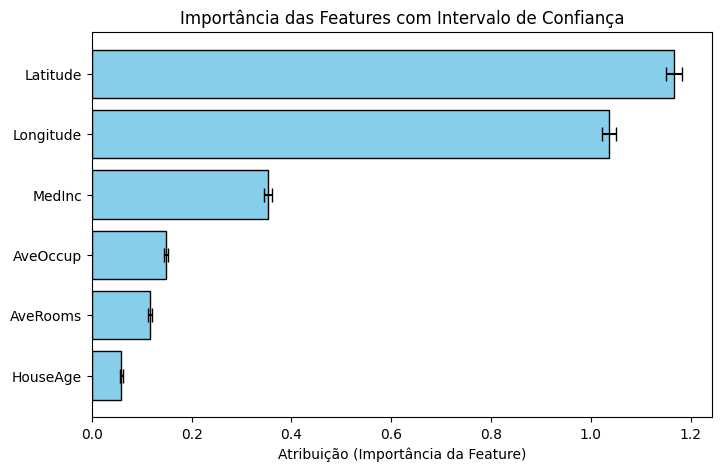

In [70]:


# Calcula os erros
errors = [
    df_importance["Attribution"] - df_importance["Lower Bound"],
    df_importance["Upper Bound"] - df_importance["Attribution"]
]

# Cria gráfico de barras horizontais com intervalos de confiança
plt.figure(figsize=(8, 5))
plt.barh(
    df_importance["Feature"],
    df_importance["Attribution"],
    xerr=errors,
    capsize=5,
    color="skyblue",
    edgecolor="black"
)
plt.xlabel("Atribuição (Importância da Feature)")
plt.title("Importância das Features com Intervalo de Confiança")
plt.gca().invert_yaxis()  # mais importante em cima
plt.show()


In [50]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Obtenha os nomes das colunas originais do dataset
california = fetch_california_housing()
feature_names = california.feature_names

# 1. Crie o array NumPy com as características do novo imóvel.
novo_imovel = np.array([[8.0, 40.0, 7.0, 1.0, 1000.0, 2.5, 38.0, -122.0]])

# 2. **CONVERTA O ARRAY NUMPY PARA UM DATAFRAME COM NOMES DE COLUNAS.**
# Isso resolve o erro.
novo_imovel_df = pd.DataFrame(novo_imovel, columns=feature_names)

# 5. Faça a previsão.
# A previsão do automlx será feita neste DataFrame.
previsao = model.predict(novo_imovel_df)

# O restante do seu código para imprimir a previsão está correto.
valor_previsao = previsao.flatten()[0]
print(f"O preço mediano previsto para este imóvel é de: ${valor_previsao * 100000:.2f}")

O preço mediano previsto para este imóvel é de: $358320.44
